<a href="https://colab.research.google.com/github/eladorpBG/ML_assignment4/blob/main/yolov5/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install torchinfo
!pip install torchviz

In [1]:
!git clone https://github.com/eladorpBG/ML_assignment4.git  # clone

Cloning into 'ML_assignment4'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 68 (delta 28), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (68/68), 8.69 MiB | 8.27 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [ ]:
!git pull ML_assignment4

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchinfo import summary
from torchviz import make_dot

In [3]:
results = pd.read_csv('ML_assignment4/yolov5/results.csv')
results = results.rename(columns=lambda x: x.strip())
results = results.rename(columns=lambda x: x.replace('/', '_'))

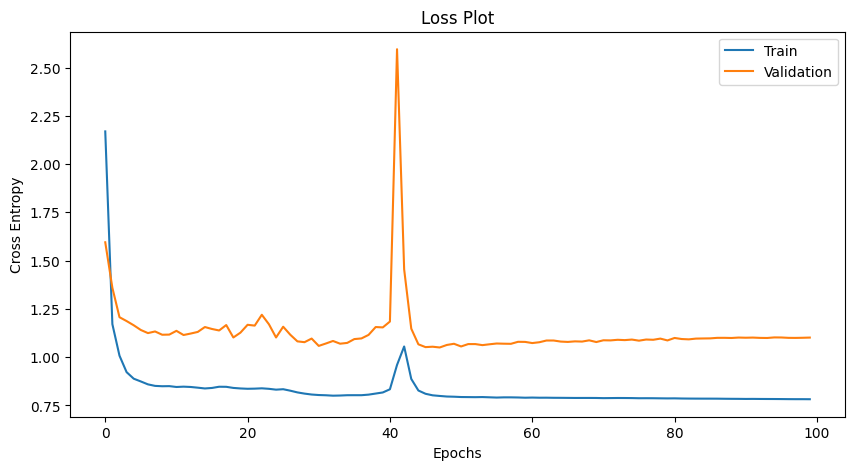

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(results['train_loss'])
plt.plot(results['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.title('Loss Plot')
plt.legend(['Train', 'Validation'])
plt.show()

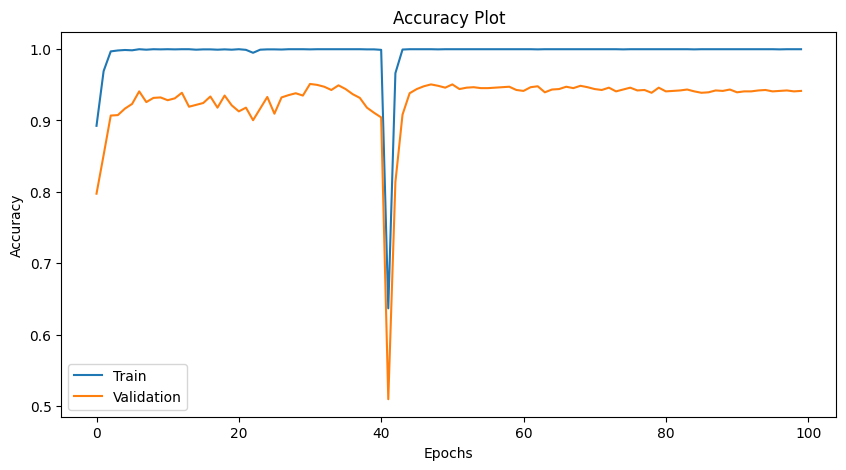

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(results['metrics_accuracy_train_top1'])
plt.plot(results['metrics_accuracy_top1'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.legend(['Train', 'Validation'])
plt.show()

In [55]:
model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/ML_assignment4/yolov5/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-29 Python-3.11.11 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 117 layers, 4297350 parameters, 0 gradients, 10.5 GFLOPs
WARNING ⚠️ YOLOv5 ClassificationModel is not yet AutoShape compatible. You must pass torch tensors in BCHW to this model, i.e. shape(1,3,224,224).


In [61]:
def calculate_output_size(input_size, kernel_size, stride, padding):
    output_size = (input_size - kernel_size + 2 * padding) // stride + 1
    return output_size

In [70]:
calculate_output_size(7, 1, 1, 0)

7

In [57]:
for layer in model.modules():
    print(layer)

DetectMultiBackend(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): 

In [67]:
summary(model,
        input_size=(16, 3, 224, 224),
        batch_dim=None,
        verbose=1,
        col_width=16,
        col_names=["kernel_size", "input_size", "output_size", "num_params"])  # Specify input dimensions


Layer (type:depth-idx)                             Kernel Shape     Input Shape      Output Shape     Param #
DetectMultiBackend                                 --               [16, 3, 224, 224] [16, 102]        --
├─ClassificationModel: 1-1                         --               [16, 3, 224, 224] [16, 102]        --
│    └─Sequential: 2-1                             --               --               --               --
│    │    └─Conv: 3-1                              --               [16, 3, 224, 224] [16, 32, 112, 112] (3,488)
│    │    └─Conv: 3-2                              --               [16, 32, 112, 112] [16, 64, 56, 56] (18,496)
│    │    └─C3: 3-3                                --               [16, 64, 56, 56] [16, 64, 56, 56] (18,624)
│    │    └─Conv: 3-4                              --               [16, 64, 56, 56] [16, 128, 28, 28] (73,856)
│    │    └─C3: 3-5                                --               [16, 128, 28, 28] [16, 128, 28, 28] (115,200)
│    │    

Layer (type:depth-idx)                             Kernel Shape     Input Shape      Output Shape     Param #
DetectMultiBackend                                 --               [16, 3, 224, 224] [16, 102]        --
├─ClassificationModel: 1-1                         --               [16, 3, 224, 224] [16, 102]        --
│    └─Sequential: 2-1                             --               --               --               --
│    │    └─Conv: 3-1                              --               [16, 3, 224, 224] [16, 32, 112, 112] (3,488)
│    │    └─Conv: 3-2                              --               [16, 32, 112, 112] [16, 64, 56, 56] (18,496)
│    │    └─C3: 3-3                                --               [16, 64, 56, 56] [16, 64, 56, 56] (18,624)
│    │    └─Conv: 3-4                              --               [16, 64, 56, 56] [16, 128, 28, 28] (73,856)
│    │    └─C3: 3-5                                --               [16, 128, 28, 28] [16, 128, 28, 28] (115,200)
│    │    